In [37]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import csv

# Exercitiul 1

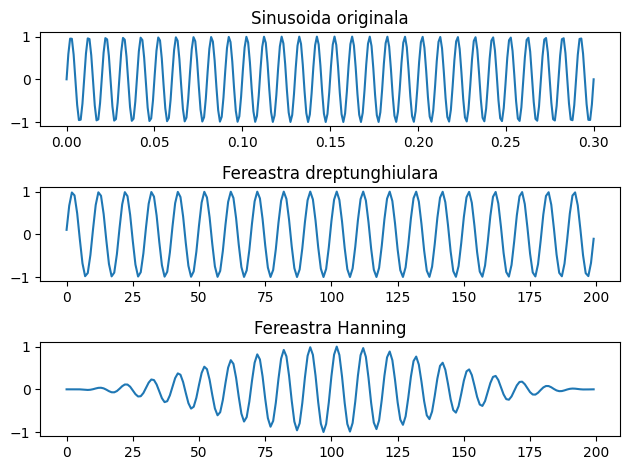

In [38]:
f = 100
Nw = 200

def fereastra_dreptunghiulara(dim):
    return np.ones(dim)

def fereastra_hanning(dim):
    ind = np.arange(0, dim)
    return 0.5 * (1 - np.cos(2 * np.pi * ind / dim))

def trim_to_window(vals, dim):
    half_v = len(vals) // 2  # jumatatea vectorului
    half_dim = dim // 2

    return vals[half_v - half_dim : half_v + half_dim]


def sin(t):
    return np.sin(2 * np.pi * f * t)

fd = fereastra_dreptunghiulara(Nw)
fh = fereastra_hanning(Nw)

time = np.linspace(0, 0.3, 300)
val = sin(time)
trimmed_val = trim_to_window(val, Nw)

fig, axs = plt.subplots(3)

axs[0].set_title("Sinusoida originala")
axs[0].plot(time, val)

axs[1].set_title("Fereastra dreptunghiulara")
axs[1].plot(fd * trimmed_val)

axs[2].set_title("Fereastra Hanning")
axs[2].plot(fh * trimmed_val)

plt.tight_layout()
plt.show()



# Exercitiul 2

### a)

72


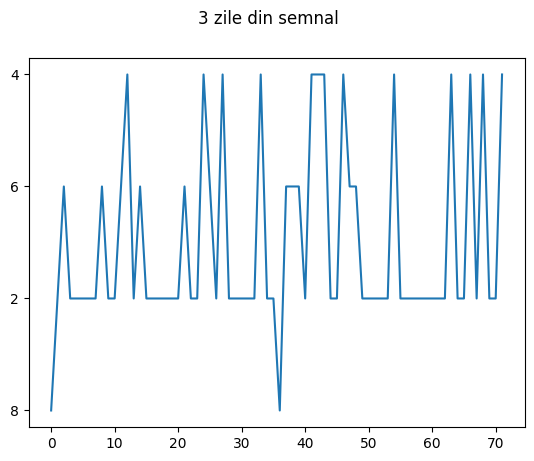

In [39]:
train_data = []
with open("Train.csv", 'r') as file:
    csvreader = csv.reader(file, delimiter='\n')
    for row in csvreader:
        c1, c2, c3 = row[0].split(',')
        train_data.append(c3)

train_data = train_data[1:]

samples = 3 * 24
x = train_data[:samples]

print(len(x))

fig, axs = plt.subplots()
fig.suptitle("3 zile din semnal")
axs.plot(x)

plt.show()


### b)

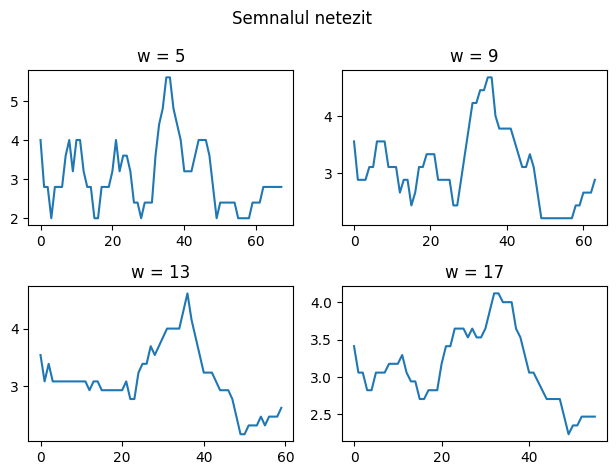

In [45]:
def medie_alunecatoare(w):
    return np.convolve(x, np.ones(w), 'valid') / w

x = np.array(x, dtype='float')

fig, axs = plt.subplots(2, 2)
fig.suptitle("Semnalul netezit")


dim = [5, 9, 13, 17]

md = [medie_alunecatoare(i) for i in dim]

axs[0][0].set_title(f"w = {dim[0]}")
axs[0][0].plot(md[0])

axs[0][1].set_title(f"w = {dim[1]}")
axs[0][1].plot(md[1])

axs[1][0].set_title(f"w = {dim[2]}")
axs[1][0].plot(md[2])

axs[1][1].set_title(f"w = {dim[3]}")
axs[1][1].plot(md[3])

plt.tight_layout()
plt.show()


### c)

In [59]:
sampling_period = 3600  # sec
fs = 1 / sampling_period
fmax = fs / 2  # frecventa Nyquist

# In anumite intervale de cateva ore din zi traficul este foarte dens, deci voi alege o frecventa de taiere egala cu o treime din frecventa de esantionare, adica 2/3 din frecventa Niquist.

cutoff_freq = fs / 3
print(f"Frecventa de taiere este {cutoff_freq:.8f} Hz")
cutoff_freq = cutoff_freq / fmax
print(f"Frecventa de taiere normalizata este {cutoff_freq:.8f}")


Frecventa de taiere este 0.00009259 Hz
Frecventa de taiere normalizata este 0.66666667


### d)

In [61]:
ordin = 5
rp = 5  # atenuarea ondulatiilor

butter_b, butter_a = scipy.signal.butter(ordin, cutoff_freq, btype='low')
cheby_b, cheby_a = scipy.signal.cheby1(ordin, rp, cutoff_freq, btype='low')


### e)

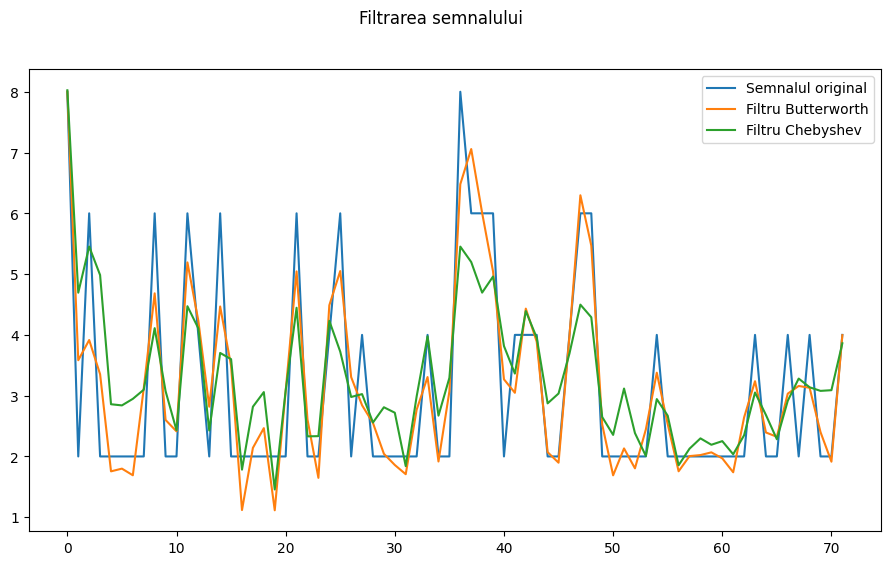

In [65]:
butter_y = scipy.signal.filtfilt(butter_b, butter_a, x)
cheby_y = scipy.signal.filtfilt(cheby_b, cheby_a, x)

plt.figure(figsize=(11, 6))
plt.suptitle('Filtrarea semnalului')

plt.plot(x, label='Semnal brut')
plt.plot(butter_y, label='Filtrat Butterworth')
plt.plot(cheby_y, label='Filtrat Chebyshev')

plt.legend()
plt.show()


Cred ca filtrul Chebyshev ne ajuta sa intelegem datele cel mai bine, atenuand frecventele inalte, dar totodata evidentiind schimbarile de frecventa in trafic.

### f)

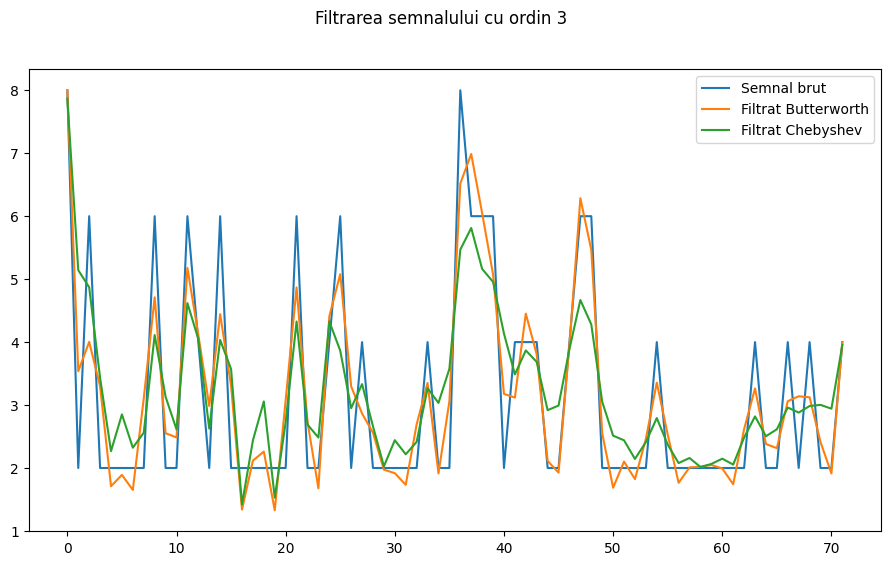

In [68]:
ordin = 3
rp = 5  # atenuarea ondulatiilor

butter_b, butter_a = scipy.signal.butter(ordin, cutoff_freq, btype='low')
cheby_b, cheby_a = scipy.signal.cheby1(ordin, rp, cutoff_freq, btype='low')

butter_y = scipy.signal.filtfilt(butter_b, butter_a, x)
cheby_y = scipy.signal.filtfilt(cheby_b, cheby_a, x)

plt.figure(figsize=(11, 6))
plt.suptitle(f'Filtrarea semnalului cu ordin {ordin}')

plt.plot(x, label='Semnal brut')
plt.plot(butter_y, label='Filtrat Butterworth')
plt.plot(cheby_y, label='Filtrat Chebyshev')

plt.legend()
plt.show()


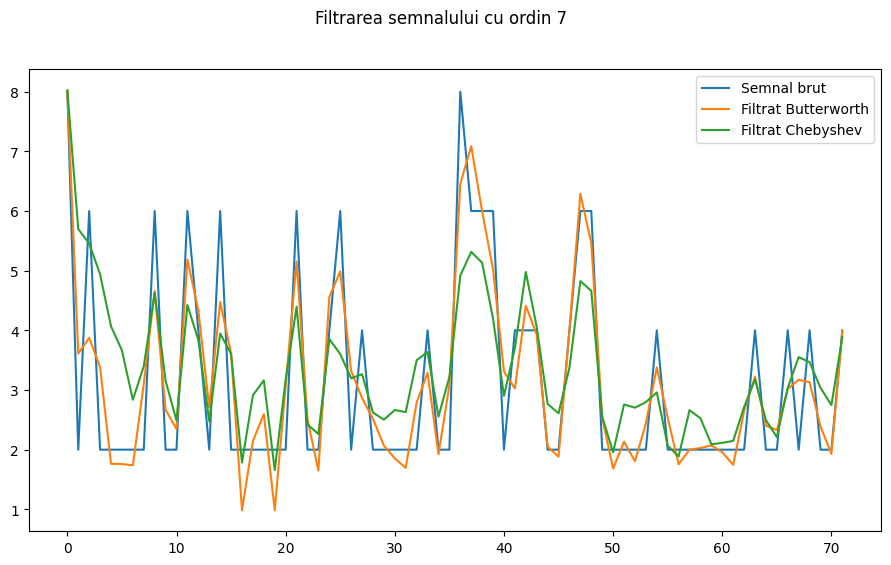

In [69]:
ordin = 7
rp = 5  # atenuarea ondulatiilor

butter_b, butter_a = scipy.signal.butter(ordin, cutoff_freq, btype='low')
cheby_b, cheby_a = scipy.signal.cheby1(ordin, rp, cutoff_freq, btype='low')

butter_y = scipy.signal.filtfilt(butter_b, butter_a, x)
cheby_y = scipy.signal.filtfilt(cheby_b, cheby_a, x)

plt.figure(figsize=(11, 6))
plt.suptitle(f'Filtrarea semnalului cu ordin {ordin}')

plt.plot(x, label='Semnal brut')
plt.plot(butter_y, label='Filtrat Butterworth')
plt.plot(cheby_y, label='Filtrat Chebyshev')

plt.legend()
plt.show()

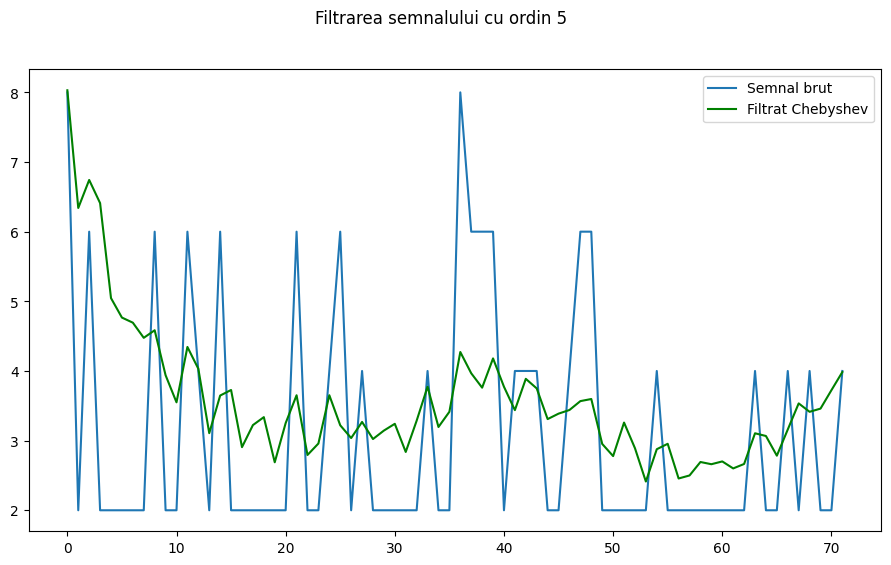

In [103]:
ordin = 5
rp = 12  # atenuarea ondulatiilor

cheby_b, cheby_a = scipy.signal.cheby1(ordin, rp, cutoff_freq, btype='low')

butter_y = scipy.signal.filtfilt(butter_b, butter_a, x)
cheby_y = scipy.signal.filtfilt(cheby_b, cheby_a, x)

plt.figure(figsize=(11, 6))
plt.suptitle(f'Filtrarea semnalului cu ordin {ordin}')

plt.plot(x, label='Semnal brut')
plt.plot(cheby_y, label='Filtrat Chebyshev', color='green')

plt.legend()
plt.show()

Pentru ambele filtre observ ca ordinul 5 le reprezinta cel mai bine.

In cazul Filtrului Chebyshev, observ ca un ripple de 10 - 12 este optim.